In [27]:
import pandas as pd

# Set display options
pd.set_option('display.max_columns', None)       # Show all columns
pd.set_option('display.width', 1000)             # Increase display width
pd.set_option('display.max_colwidth', None) 

# Load dataset
iris_df = pd.read_csv('Iris.csv')
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [28]:
print(iris_df.describe(include='all'))

                Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
count   150.000000     150.000000    150.000000     150.000000    150.000000          150
unique         NaN            NaN           NaN            NaN           NaN            3
top            NaN            NaN           NaN            NaN           NaN  Iris-setosa
freq           NaN            NaN           NaN            NaN           NaN           50
mean     75.500000       5.843333      3.054000       3.758667      1.198667          NaN
std      43.445368       0.828066      0.433594       1.764420      0.763161          NaN
min       1.000000       4.300000      2.000000       1.000000      0.100000          NaN
25%      38.250000       5.100000      2.800000       1.600000      0.300000          NaN
50%      75.500000       5.800000      3.000000       4.350000      1.300000          NaN
75%     112.750000       6.400000      3.300000       5.100000      1.800000          NaN
max     15

In [29]:
print(iris_df.isnull().sum())

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64


In [30]:
# Drop the 'Id' column
iris_df.drop('Id', axis=1, inplace=True)
iris_df.shape

(150, 5)

In [31]:
# Check for duplicates
print(f"Duplicate rows: {iris_df.duplicated().sum()}")

Duplicate rows: 3


In [32]:
# Remove duplicates
iris_df = iris_df.drop_duplicates()
iris_df.shape

(147, 5)

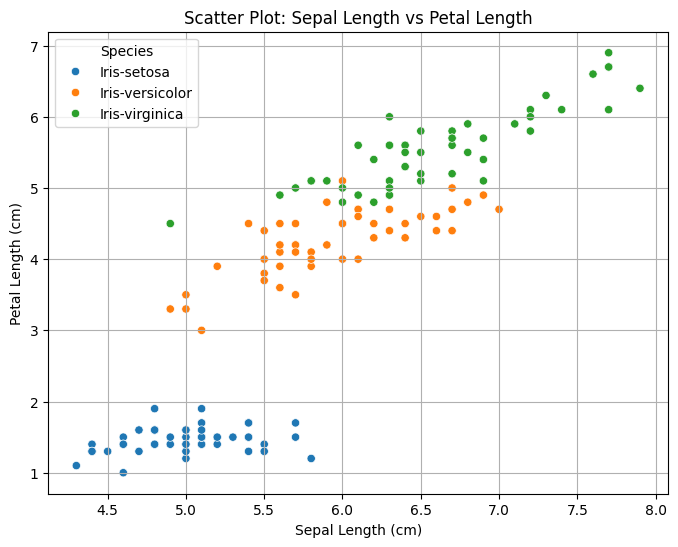

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.scatterplot(x='SepalLengthCm', y='PetalLengthCm', hue='Species', data=iris_df)
plt.title('Scatter Plot: Sepal Length vs Petal Length')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Petal Length (cm)')
plt.grid(True)
plt.show()

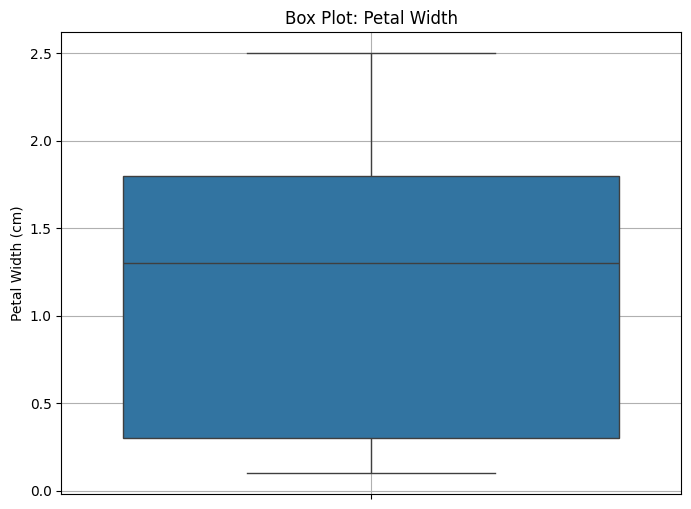

In [35]:
plt.figure(figsize=(8, 6))
sns.boxplot(y='PetalWidthCm', data=iris_df)
plt.title('Box Plot: Petal Width')
plt.ylabel('Petal Width (cm)')
plt.grid(True)
plt.show()

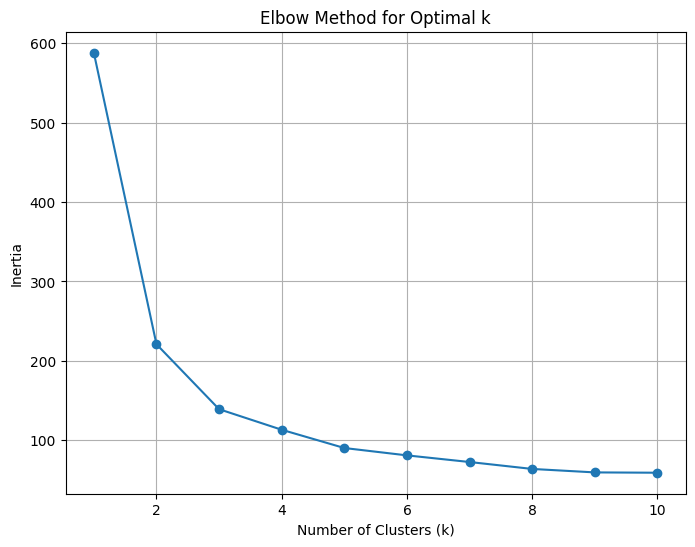

In [36]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Prepare features (drop Species)
features = iris_df.drop('Species', axis=1)

# Normalize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(features)

# Elbow method to find optimal k
inertia = []
k_range = range(1, 11)

for k in k_range:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(scaled_data)
    inertia.append(km.inertia_)

# Plot Elbow Graph
plt.figure(figsize=(8, 6))
plt.plot(k_range, inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

In [37]:
from sklearn.metrics import silhouette_score, davies_bouldin_score

print("Clustering Evaluation Metrics:")
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(scaled_data)
    
    sil_score = silhouette_score(scaled_data, labels)
    db_index = davies_bouldin_score(scaled_data, labels)
    
    print(f"k={k} | Silhouette Score: {sil_score:.2f} | Davies Bouldin Index: {db_index:.2f}")

Clustering Evaluation Metrics:
k=2 | Silhouette Score: 0.58 | Davies Bouldin Index: 0.60
k=3 | Silhouette Score: 0.46 | Davies Bouldin Index: 0.82
k=4 | Silhouette Score: 0.41 | Davies Bouldin Index: 0.92
k=5 | Silhouette Score: 0.34 | Davies Bouldin Index: 0.96
k=6 | Silhouette Score: 0.34 | Davies Bouldin Index: 0.91
k=7 | Silhouette Score: 0.28 | Davies Bouldin Index: 1.10
k=8 | Silhouette Score: 0.31 | Davies Bouldin Index: 0.96
k=9 | Silhouette Score: 0.31 | Davies Bouldin Index: 0.97
k=10 | Silhouette Score: 0.30 | Davies Bouldin Index: 0.99
